<h1 style="background-color:DodgerBlue;"> Anamoly detection || Machine Learning:: One-Class SVM</h1>

## 🧪 **Scenario: Credit Card Spending Pattern Detection**
- High-dimensional: 6 features
- Goal: Detect abnormal sessions (e.g., potential DDoS, scans, etc.)

**Credit card Spending data** — it has multiple features like:

- `daily_avg_spend`
- `transactions_per_day`
- `avg_transaction_amount`
- `refund_ratio`
- `weekend_spend_ratio`

These features are great for detecting anomalies like:
- Sudden surge in spending  
- Abnormal refund patterns  
- Unusual transaction frequency

### 🐍 **1. Generate Synthetic Customer Spending Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(123)

# Normal spending behavior (500 samples)
normal_data = {
    'daily_avg_spend': np.random.normal(200, 50, 500),
    'transactions_per_day': np.random.normal(5, 1.5, 500),
    'avg_transaction_amount': np.random.normal(40, 10, 500),
    'refund_ratio': np.random.normal(0.02, 0.01, 500),
    'weekend_spend_ratio': np.random.normal(0.3, 0.1, 500)
}

# Anomalous behavior (30 samples)
anomalies = {
    'daily_avg_spend': np.random.normal(1000, 100, 30),
    'transactions_per_day': np.random.normal(20, 5, 30),
    'avg_transaction_amount': np.random.normal(200, 50, 30),
    'refund_ratio': np.random.normal(0.5, 0.1, 30),
    'weekend_spend_ratio': np.random.normal(0.8, 0.1, 30)
}

# Combine into one DataFrame
df_normal = pd.DataFrame(normal_data)
df_anomaly = pd.DataFrame(anomalies)
df = pd.concat([df_normal, df_anomaly], ignore_index=True)

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,daily_avg_spend,transactions_per_day,avg_transaction_amount,refund_ratio,weekend_spend_ratio
0,184.052151,6.962778,29.211031,0.010756,0.245155
1,180.455010,4.291204,32.428359,0.030907,-0.006699
2,172.403156,5.614033,39.238595,0.040272,0.131822
3,205.522655,3.118725,48.475174,0.020884,0.128033
4,216.084329,5.900857,53.930662,0.014509,0.175392


### 🧠 **2. Apply One-Class SVM**

In [2]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Fit One-Class SVM
clf = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
y_pred = clf.fit_predict(X_scaled)

# Add prediction to dataframe
df['anomaly'] = (y_pred == -1)
df.head()

,daily_avg_spend,transactions_per_day,avg_transaction_amount,refund_ratio,weekend_spend_ratio,anomaly
0,184.052151,6.962778,29.211031,0.010756,0.245155,False
1,180.455010,4.291204,32.428359,0.030907,-0.006699,True
2,172.403156,5.614033,39.238595,0.040272,0.131822,False
3,205.522655,3.118725,48.475174,0.020884,0.128033,False
4,216.084329,5.900857,53.930662,0.014509,0.175392,False


### 📉 **3. Visualize with PCA**

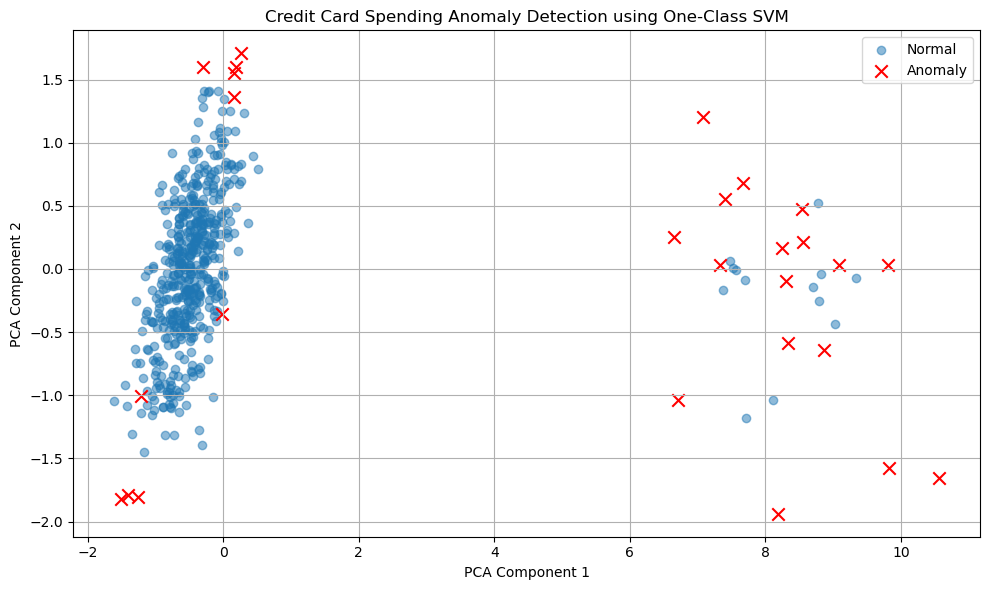

In [3]:
# PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df[df['anomaly'] == False]['pca_1'],
            df[df['anomaly'] == False]['pca_2'],
            label='Normal', alpha=0.5)

plt.scatter(df[df['anomaly'] == True]['pca_1'],
            df[df['anomaly'] == True]['pca_2'],
            color='red', label='Anomaly', marker='x', s=80)

plt.title('Credit Card Spending Anomaly Detection using One-Class SVM')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧠 **Interpretation**

- 🔴 **Red Xs** = Customers with highly unusual spending patterns.
- ✅ **Normal behavior** is enclosed by the decision boundary learned by One-Class SVM.
- ⚙️ **Why use One-Class SVM?** It's ideal when you have **lots of "normal" data** and want to detect **outliers**, especially in **dense, nonlinear spaces**.



### 🧪 **4. Test a New Sample**

In [4]:
# New customer sample for testing
new_sample = pd.DataFrame([{
    'daily_avg_spend': 1200,
    'transactions_per_day': 18,
    'avg_transaction_amount': 250,
    'refund_ratio': 0.55,
    'weekend_spend_ratio': 0.85
}])

# Scale using the same scaler
new_sample_scaled = scaler.transform(new_sample)

# Predict with trained model
prediction = clf.predict(new_sample_scaled)

# Output result
if prediction[0] == -1:
    print("🚨 The new customer behavior is an ANOMALY.")
else:
    print("✅ The new customer behavior is NORMAL.")


🚨 The new customer behavior is an ANOMALY.


### 💾 **5. Export Detected Anomalies**

In [5]:
# Filter only the anomalies
anomalies_df = df[df['anomaly'] == True]

# Export to CSV
anomalies_df.to_csv('credit_card_spending_anomalies.csv', index=False)


✅ This will create a file named `credit_card_spending_anomalies.csv` in your working directory containing only the rows flagged as anomalies 🛡️